# Snow Movie

Sometimes the best visualization is a movie

In [8]:
import os
import time
import glob
import LatLon 
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)

# plot
%matplotlib inline
import pylab
import seaborn as sns
sns.set_style("whitegrid")
from pysurvey.plot import setup, legend, icolorbar, density

# date
from dateutil import parser
from matplotlib.dates import date2num

# database
import dataset
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database

# Movie
from ipywidgets import interact, interactive, fixed
from mpl_toolkits.mplot3d import Axes3D

In [4]:
clean = pd.DataFrame.from_csv('/Users/ajmendez/tmp/flight/flight_clean.csv')

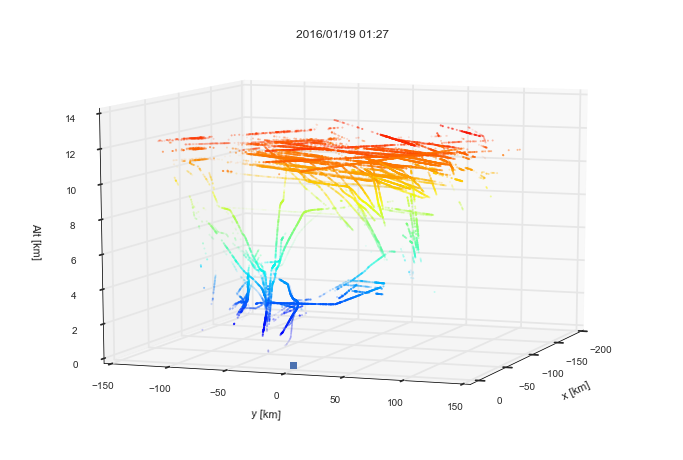

In [7]:
def make_3dplot(time=9, delta=6, el=10, az=20):
    '''
    time in days
    delta in hours
    
    '''
    d = delta/24.0
    
    fig = pylab.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    ax.set_zlabel('Alt [km]')

    ax.plot([0],[0],zs=[0],marker='s')
    ii = np.where( (clean['datenum'] > time-d) &
                   (clean['datenum'] <= time) )[0]
    z = clean['alt'][ii]*0.0003048
    #rise and fall
#     alpha = np.abs(clean['datenum'][ii] - time) / d
    # fall only
    alpha = np.abs(clean['datenum'][ii] - (time)) / d
    
    c = pylab.cm.jet(z/14.0)
#     c = pylab.cm.jet(alpha)
    c[:,-1] = np.clip(1.0-alpha,0.02,0.7)
    ax.scatter(clean['x'][ii], clean['y'][ii], z, 
#                c=z, cmap=pylab.cm.jet, vmin=0, vmax=12, 
               c=c,
               marker='o', s=4, linewidths=0, #marker='.',
               edgecolor='none')
    
    ax.view_init(elev=el, azim=az)
    ax.autoscale(False)
    ax.set_zlim(0,14)
    ax.set_xlim(-200,10)
    ax.set_ylim(-150,150)
    
    
#     i = ii[np.argmin(clean['datenum'][ii])]
    i = np.max(ii)
    note = ' [Snow]' if (clean['datenum'][i] > 8) and (clean['datenum'][i] < 10) else ''
    pylab.title('{} {}{}'.format(clean['date'][i], clean['time'][i][:5], note),
               fontsize=12)
    
    return ax
_ = interact(make_3dplot, time=(0,14,1), delta=(0,24,1), el=(0,90,10), az=(20,120,10))

In [10]:
def _movie():
    nframes = 1200
    elevs = np.concatenate([np.linspace(5,25,nframes/2),
                            np.linspace(25,5,nframes/2)])
    azims = np.linspace(20,360+20,nframes)
    times = np.linspace(0,14,nframes)
    delta = 6.0

    for i,(e,a,t) in enumerate(zip(elevs, azims, times)):
        outfile = '/Users/ajmendez/tmp/flight/movies/pan_{:04d}.png'.format(i)
        basedir = os.path.dirname(outfile)
        if not os.path.exists(basedir):
            os.makedirs(basedir)
        if os.path.exists(outfile):
            continue

#         print i,
        print '.',
        ax = make_3dplot(time=t, delta=delta, el=e, az=a)
        
#         if i == 0:
#             ax = make_3dplot(e,a)
#         ax.view_init(elev=e, azim=a)
        pylab.savefig(outfile)
        pylab.close()
_movie()

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
